In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vaccination-data/vaccination-data(26-08-2021).csv
/kaggle/input/vaccination-data/vaccination-data(31-08-2021).csv


# Importing all required dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
print("Import Successful")

Import Successful


# Reading WHO vaccination data into a datafarame, and then filtering out the "Reporting" data from AMRO(America Region Based Countries) 

In [3]:
data = pd.read_csv("../input/vaccination-data/vaccination-data(31-08-2021).csv") # read csv into dataframe
region = data['WHO_REGION'].unique()
data = data[data['WHO_REGION'] == 'AMRO'] #AMRO countries filtered
data = data[data['DATA_SOURCE'] == 'REPORTING'] #Reporting data considered
data = data.dropna() #countries with missing data dropped
data = data.reset_index() #data pre-processing
print(region)
print(data.columns)


['EMRO' 'EURO' 'AFRO' 'WPRO' 'AMRO' 'SEARO' 'OTHER']
Index(['index', 'COUNTRY', 'ISO3', 'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED',
       'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'VACCINES_USED', 'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED'],
      dtype='object')


# A bar plot to depict the amount of vaccinations the different countries in the Americas have given out

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


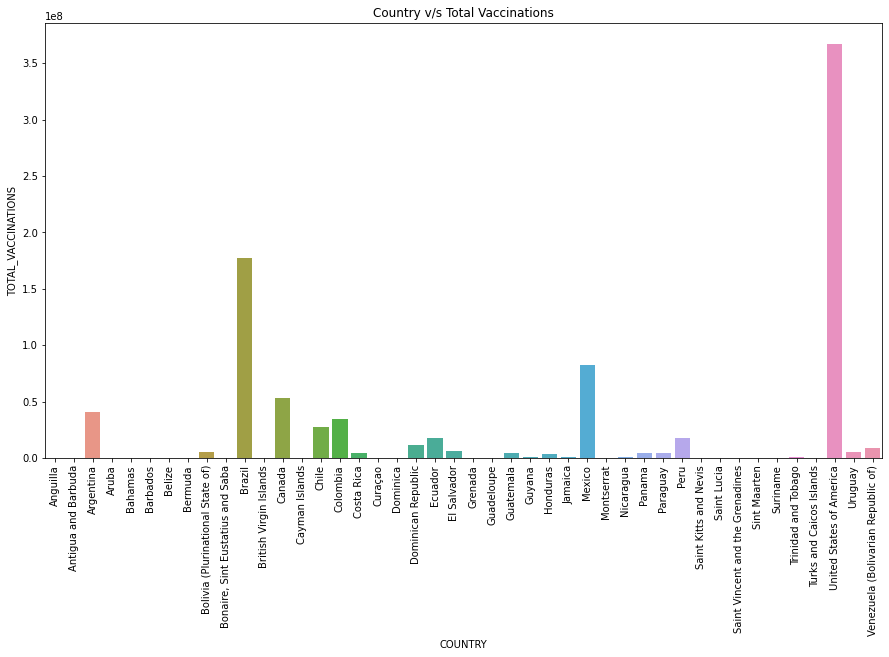

In [4]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
plt.title("Country v/s Total Vaccinations")
ax = sns.barplot(data['COUNTRY'],data['TOTAL_VACCINATIONS']) #barplot Country v/s Total Vaccinations 
plt.savefig("1.png",bbox_inches='tight')
plt.show()

# Bar plot to depict the vaccinations given out by countries in America **per 100 people**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


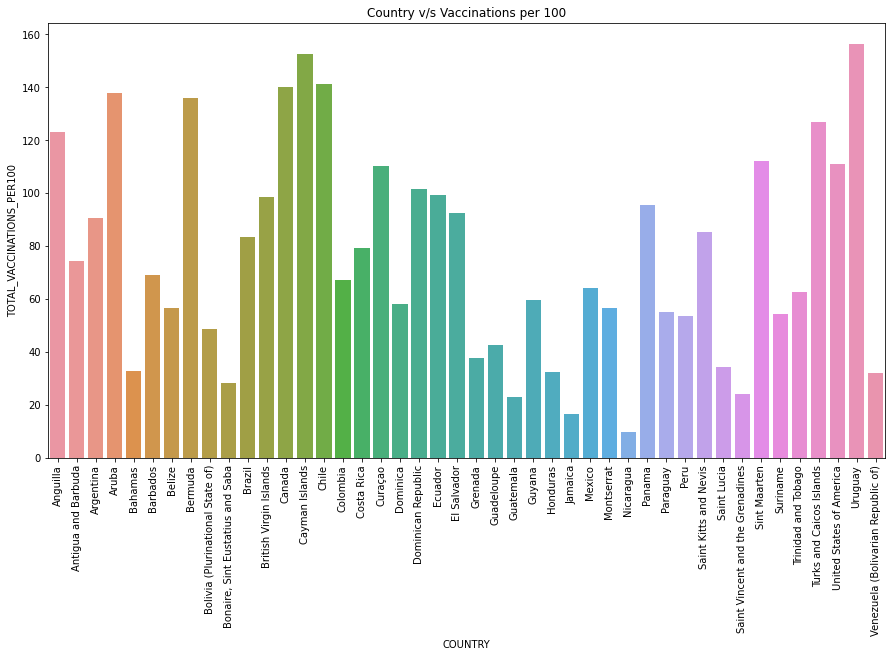

In [5]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
plt.title("Country v/s Vaccinations per 100")
ax = sns.barplot(data['COUNTRY'],data['TOTAL_VACCINATIONS_PER100']) #barplot Country v/s Vaccinations per 100
plt.savefig("2.png",bbox_inches='tight')
plt.show()

# Bar plot to depict first dosage given out by countries in America **per 100 people**


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


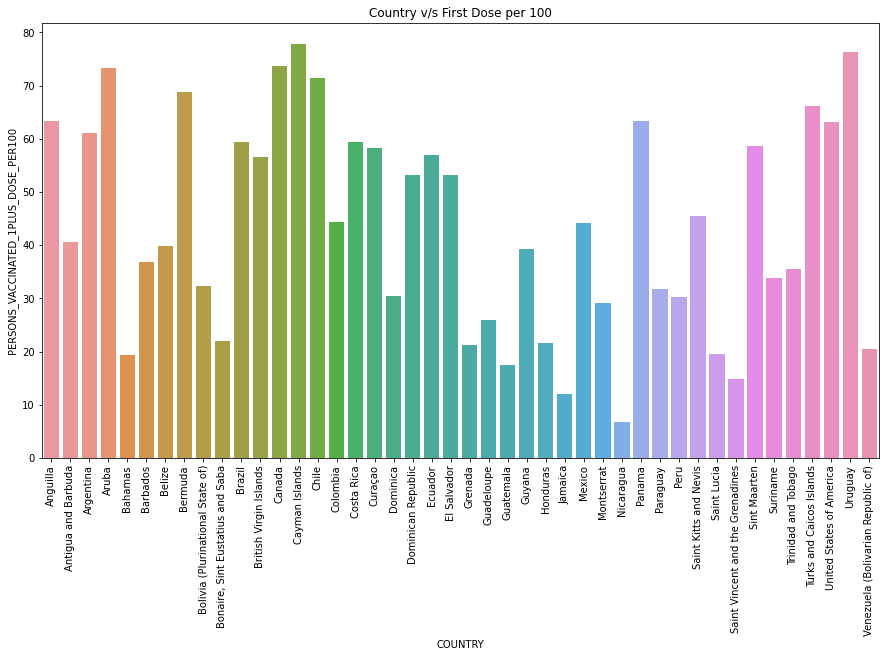

In [6]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
plt.title("Country v/s First Dose per 100")
ax = sns.barplot(data['COUNTRY'],data['PERSONS_VACCINATED_1PLUS_DOSE_PER100']) # barplot Country v/s First Dose per 100
plt.savefig("3.png",bbox_inches='tight')
plt.show()

# Bar plot to depict second dosage/full dosage given out by countries in America **per 100 people**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


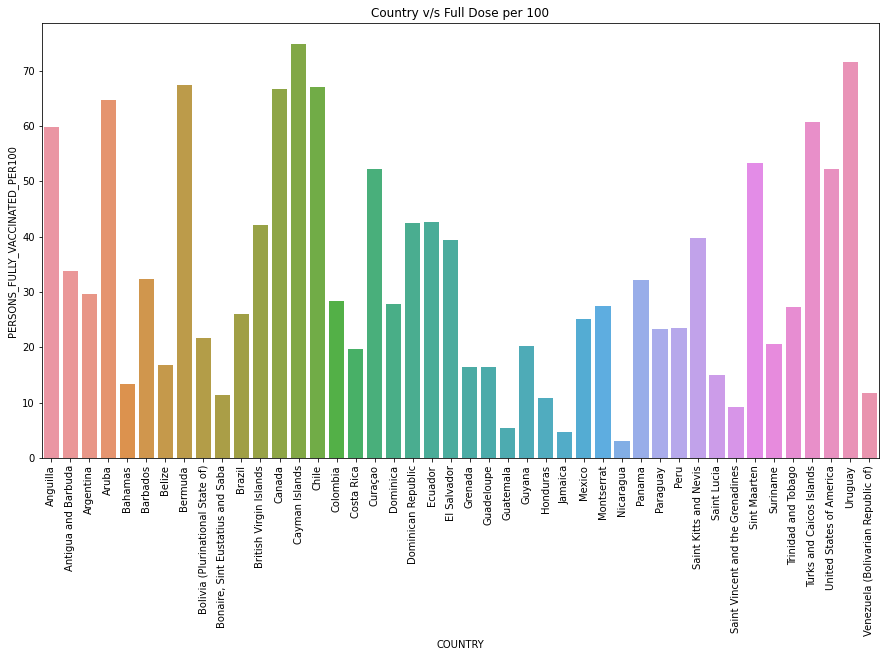

In [7]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
plt.title("Country v/s Full Dose per 100")
ax = sns.barplot(data['COUNTRY'],data['PERSONS_FULLY_VACCINATED_PER100']) #barplot Country v/s Full Dose per 100
plt.savefig("4.png",bbox_inches='tight')
plt.show()

# Scatterplot to study the correlation between the number of vaccines offered by an American country and the effect it has on people adopting vaccines

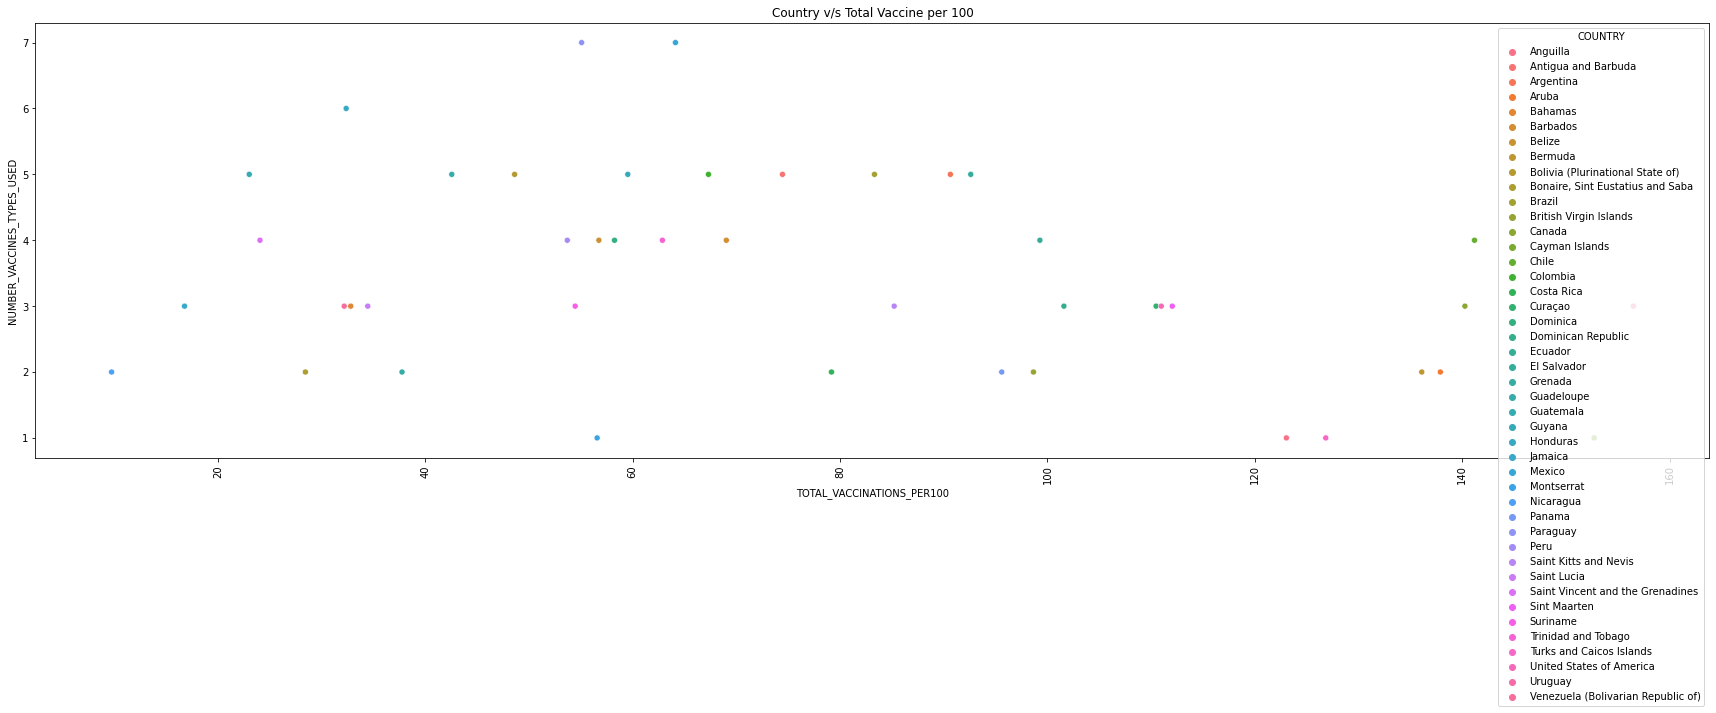

In [8]:
plt.figure(figsize = (30,8))
plt.xticks(rotation=90)
plt.title("Country Total Vaccine per 100 V/s Number of Vaccines types used")
ax = sns.scatterplot(x= data['TOTAL_VACCINATIONS_PER100'],y= data['NUMBER_VACCINES_TYPES_USED'], hue=data["COUNTRY"]) #Scatterplot Country V/s Total Vaccine per 100
plt.savefig("5.png",bbox_inches='tight')
plt.show()

# A stacked bar plot to study the difference in number between first dosage citizens and full dosage citizens of individual countries

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


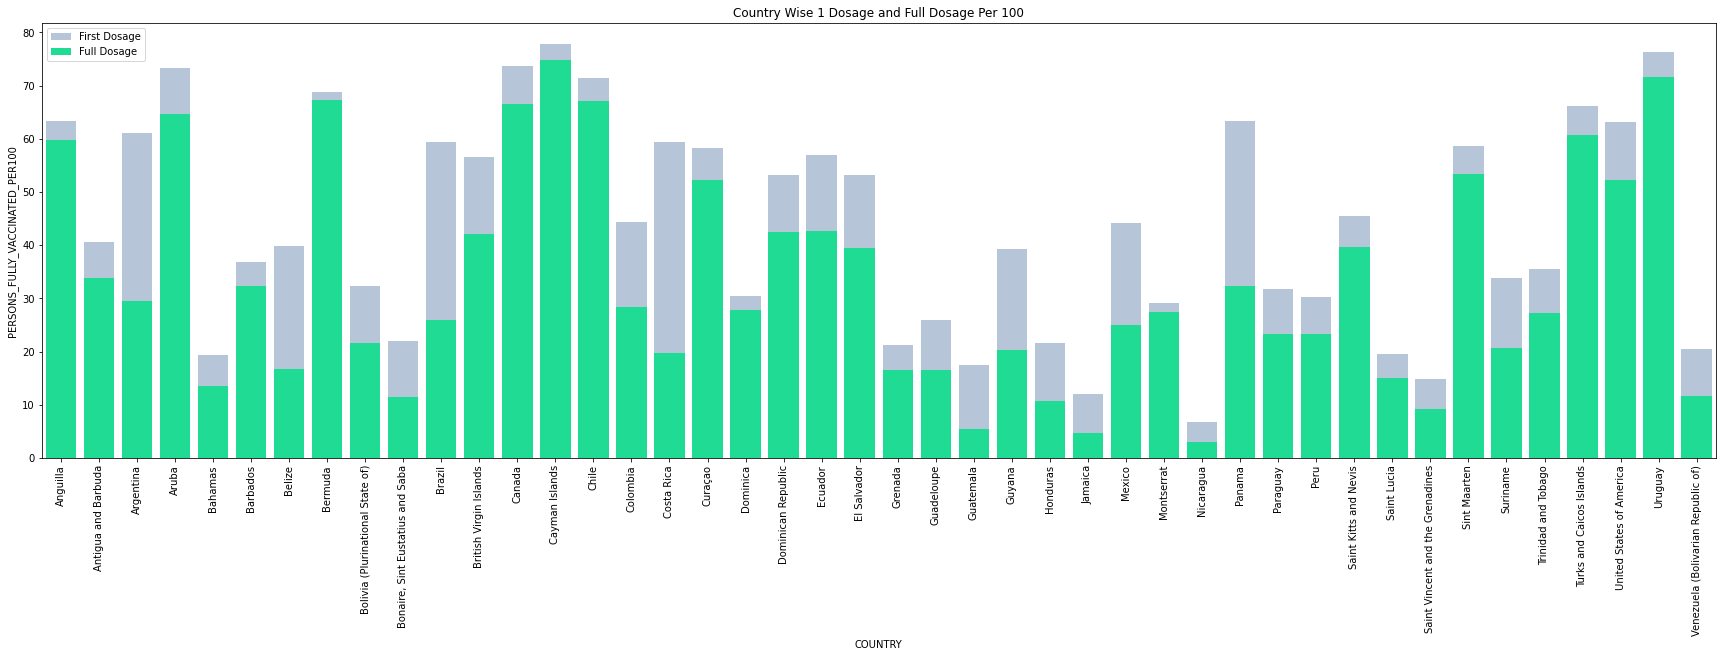

In [12]:
plt.figure(figsize = (30,8))
plt.xticks(rotation=90)
plt.title("Country Wise 1 Dosage and Full Dosage Per 100")
b1 = sns.barplot(data['COUNTRY'],data['PERSONS_VACCINATED_1PLUS_DOSE_PER100'],label = 'First Dosage',color='lightsteelblue') #barplot b1 first dosage
b2 = sns.barplot(data['COUNTRY'],data['PERSONS_FULLY_VACCINATED_PER100'], label = 'Full Dosage', color = 'mediumspringgreen') # barplot b2 full dosage
plt.legend()
plt.savefig("6.png",bbox_inches='tight')
plt.show()

# Computations to get an overview of vaccination status of the countries encompassed in AMRO

In [14]:
total_countries = data['COUNTRY'].count() #Total number of countries in AMRO
print(total_countries)
data['Population'] = (data['TOTAL_VACCINATIONS']/100)*data['TOTAL_VACCINATIONS_PER100'] #computing populations for individual countries
print(data[['COUNTRY','Population']].head())
dose1 = data['PERSONS_VACCINATED_1PLUS_DOSE'].sum() #First Dosage citizen count
dose2 = data['PERSONS_FULLY_VACCINATED'].sum() #Full Dosage citizen count
popu = data['Population'].sum() #Total AMRO population count

44
               COUNTRY    Population
0             Anguilla  2.271017e+04
1  Antigua and Barbuda  5.427116e+04
2            Argentina  3.712354e+07
3                Aruba  2.029775e+05
4              Bahamas  4.232790e+04


# Pie charts to depict percentages of citizens receiving first dosage with respect to total population, full dosage with respect to total population,and full dosage with respect to full dosage.

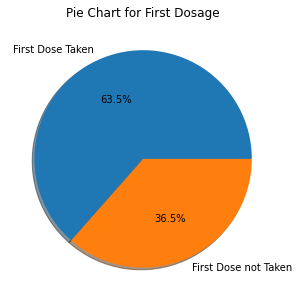

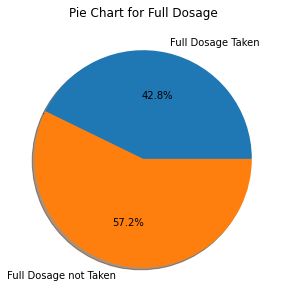

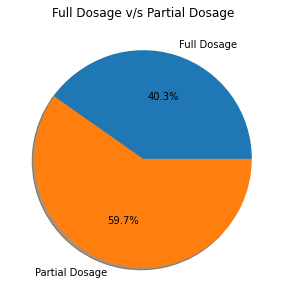

In [13]:
plt.figure(figsize = (5,5))
plt.title("Pie Chart for First Dosage")
sizes = [dose1,popu-dose1]
ax = plt.pie(sizes, labels=["First Dose Taken", "First Dose not Taken"], autopct='%1.1f%%',
        shadow=True) #Pie Chart First Dosage percentage in AMRO
plt.savefig("7.png",bbox_inches='tight')
# plt.show()

plt.figure(figsize = (5,5))
plt.title("Pie Chart for Full Dosage")
sizes = [dose2,popu-dose2]
ax = plt.pie(sizes, labels=["Full Dosage Taken", "Full Dosage not Taken"], autopct='%1.1f%%',
        shadow=True) #Pie Chart Full Dosage percentage in AMRO
plt.savefig("8.png",bbox_inches='tight')
# plt.show()

plt.figure(figsize = (5,5))
plt.title("Full Dosage v/s Partial Dosage")
sizes = [dose2,dose1]
ax = plt.pie(sizes, labels=["Full Dosage","Partial Dosage"], autopct='%1.1f%%',
        shadow=True) #Pie Chart for Full Dosage and First Dosage breakup
plt.savefig("9.png",bbox_inches='tight')
plt.show()
